In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Параметры бизнес модели:

Расчет параметров бизнес-модели в данном случае проводился на основе логических соображений. Однако, для достижения более высокой точности в оценке целевой аудитории, конверсии, каналов продаж, новых пользователей и других ключевых показателей, рекомендуется воспользоваться более детализированным исследованием с использованием данных из онлайн-кинотеатра Start, который предоставляет актуальную информацию о рынке и пользовательском поведении в данной сфере.

Построение подобной бизнес-модели на основе данных из онлайн-кинотеатра Start https://moscow.megafon.ru/services/joy/start/ позволит более точно адаптировать стратегию к реальным условиям рынка и потребностям клиентов, что, в свою очередь, может способствовать повышению эффективности бизнеса и принятию обоснованных решений по его развитию.

In [2]:
subscription_price = 399  # Стоимость подписки в рублях
trial_duration_months = 1  # Длительность триала в месяцах
okko_costs_percentage = 0.7  # Процент затрат в сторону Okko
subscription_duration_months = 1  # Длительность подписки в месяцах (1 месяц)

In [3]:
megafon_all_base = 76000000  # абонентская база МегаФон
new_users_megafon = random.randint(1000000, 2000000)  # предположим, что в мегафон ежемесячно приходит столько новых пользователей

In [4]:
target_audience = round(megafon_all_base / 100 * random.randint(15,20))  # предположим, что целевая аудитория это 15-20% от общей абонентской базы МегаФона
target_new_audience = [round(new_users_megafon / 100 * random.randint(15, 20)) for _ in range(1, 13)]  #ежемесячные 15-20% целевых новых пользователей

In [5]:
target_audience #Целевая аудитория от общей абонентской базы

13680000

In [6]:
target_new_audience #Целевая аудитория от ежемесячных новых пользователей абонентской базы

[212642,
 179067,
 223834,
 201450,
 190259,
 223834,
 223834,
 167875,
 201450,
 179067,
 190259,
 223834]

In [7]:
channels = {
    'Sales office': random.uniform(0.04, 0.05), # Конверсия из точек продаж Мегафон 4-5%
    'Partner office': random.uniform(0.03,0.04), # Конверсия из точек продаж партнеров Мегафон 3-4%%
    'SMS': random.uniform(0.02, 0.03),  # Конверсия из SMS-рассылок: 2-3%
    'Mobile App': random.uniform(0.01, 0.02),  # Конверсия из мобильного приложения МегаФона: 1-2%
    'Online Ads': random.uniform(0.01, 0.02)  # Конверсия из контекстной рекламы: 1-2%
}

In [8]:
sales_data = {}
for channel, conversion_rate in channels.items():
    sales_data[channel] = round(conversion_rate * target_audience)
target_audience = 0
for channel, people in sales_data.items():
    target_audience += people

In [9]:
sales_data_new_users = []
for i in range(12):
    sales_data_new = {}  # Cловарь для каждого месяца
    for channel, conversion_rate in channels.items():
        sales_data_new[channel] = round(conversion_rate * target_new_audience[i])
    sales_data_new_users.append(sales_data_new)
target_new_audience = []
for i in range(12):    
    total_people = sum(sales_data_new_users[i].values()) 
    target_new_audience.append(total_people)

In [10]:
#уровень продаж на основе каналов продаж и их конверсии:
sales_data

{'Sales office': 584005,
 'Partner office': 493981,
 'SMS': 369013,
 'Mobile App': 153897,
 'Online Ads': 220360}

In [11]:
#Целевая аудитория с учетом конверсии
target_audience

1821256

In [12]:
#уровень продаж на основе каналов продаж и их конверсии для новых пользователей:
sales_data_new_users

[{'Sales office': 9078,
  'Partner office': 7678,
  'SMS': 5736,
  'Mobile App': 2392,
  'Online Ads': 3425},
 {'Sales office': 7644,
  'Partner office': 6466,
  'SMS': 4830,
  'Mobile App': 2014,
  'Online Ads': 2884},
 {'Sales office': 9556,
  'Partner office': 8083,
  'SMS': 6038,
  'Mobile App': 2518,
  'Online Ads': 3606},
 {'Sales office': 8600,
  'Partner office': 7274,
  'SMS': 5434,
  'Mobile App': 2266,
  'Online Ads': 3245},
 {'Sales office': 8122,
  'Partner office': 6870,
  'SMS': 5132,
  'Mobile App': 2140,
  'Online Ads': 3065},
 {'Sales office': 9556,
  'Partner office': 8083,
  'SMS': 6038,
  'Mobile App': 2518,
  'Online Ads': 3606},
 {'Sales office': 9556,
  'Partner office': 8083,
  'SMS': 6038,
  'Mobile App': 2518,
  'Online Ads': 3606},
 {'Sales office': 7167,
  'Partner office': 6062,
  'SMS': 4528,
  'Mobile App': 1889,
  'Online Ads': 2704},
 {'Sales office': 8600,
  'Partner office': 7274,
  'SMS': 5434,
  'Mobile App': 2266,
  'Online Ads': 3245},
 {'Sales o

In [13]:
#Целевая аудитория из новых пользователей с учетом конверсии
target_new_audience

[28309,
 23838,
 29801,
 26819,
 25329,
 29801,
 29801,
 22350,
 26819,
 23838,
 25329,
 29801]

# Расчет уровня продаж и дожития на подписке:

Предположим, что при запуске сервиса общее количество пользователей составляет сумму целевой аудитории (target_audience) и новых пользователей (target_new_audience). На этом этапе отток пользователей практически отсутствует, так как все пользователи начинают с использования бесплатной пробной подписки.

Со второго месяца после запуска начинается отток пользователей, который составляет примерно 40-50% от общего числа пользователей. В то же время, каждый месяц к числу пользователей прибавляется 15-20% новых пользователей сервиса.

Учитывая, что стоимость триальной подписки составляет всего 1 рубль, Маржа МегаФона в начальный период будет равна 70% от общего числа пользователей ((target_audience + target_new_audience) *0.7).

С последующими месяцами отток пользователей должен постепенно снижаться. Допустим, что после первого месяца отток составит 15-20%. На основании представленной бизнес-модели можно оценить следующие экономические показатели бизнеса:

In [14]:
months = [1]
x = round(target_audience * random.uniform(0.8, 0.85))
total_users = [round(x + target_new_audience[0])]
new_users_list = [target_new_audience[0]]
paying_users_list = [x - target_new_audience[0]]
revenue_users_list = [(paying_users_list[0] * 399) + (new_users_list[0] * 1)] 
margin_users_list = [revenue_users_list[0] * 0.3]  
expenses_users_list = [revenue_users_list[0] * 0.7]

for i in range(2, 13):
    new_users = target_new_audience[i-1]
    paying_users = paying_users_list[-1] - target_new_audience[i-2]
    revenue_paying = paying_users * 399
    revenue_new = new_users * 1
    revenue_total = revenue_paying + revenue_new
    margin = revenue_total * 0.3
    expenses = revenue_total * 0.7
    
    months.append(i)
    x = (round(total_users[-1] - target_new_audience[i - 2]) * round(random.uniform(0.8, 0.85))) + round(target_new_audience[i - 1] * random.uniform(0.5, 0.6))
    total_users.append(x)
    new_users_list.append(new_users)
    paying_users_list.append(paying_users)
    revenue_users_list.append(revenue_total)
    margin_users_list.append(margin)
    expenses_users_list.append(expenses)

df_megafon = pd.DataFrame({
    'Месяц': months,
    'Всего пользователей после месяца': total_users,
    'Новых пользователей': new_users_list,
    'Платящих пользователей': paying_users_list,
    'Выручка': revenue_users_list,
    'Маржа МегаФона': margin_users_list,
    'Затраты на Okko': expenses_users_list
})
#для более качественного заполнения df_megafon можно добавить, такие показатели как churn,
#вывести пользователей, которые используют подписку, но при этом не пользуются сервисом Okko,
#процентные соотношения, однако при построение дашбордов вышеперечисленные показатели возможно получить из данной модели.

In [15]:
df_megafon

,Месяц,Всего пользователей после месяца,Новых пользователей,Платящих пользователей,Выручка,Маржа МегаФона,Затраты на Okko
0,1,1498641,28309,1442023,575395486,172618645.8,402776840.2
1,2,1482877,23838,1413714,564095724,169228717.2,394867006.8
2,3,1475002,29801,1389876,554590325,166377097.5,388213227.5
3,4,1459238,26819,1360075,542696744,162809023.2,379887720.8
4,5,1445874,25329,1333256,531994473,159598341.9,372396131.1
5,6,1438248,29801,1307927,521892674,156567802.2,365324871.8
6,7,1424600,29801,1278126,510002075,153000622.5,357001452.5
7,8,1407777,22350,1248325,498104025,149431207.5,348672817.5
8,9,1401154,26819,1225975,489190844,146757253.2,342433590.8
9,10,1388432,23838,1199156,478487082,143546124.6,334940957.4


# Метрики

 Для мониторинга проекта следует использовать когортный анализ для отслеживания действий пользователей за определенный временной период и отображать в дашбордах такие показатели как:
 - Конверсия из триала в платную подписку
 - Процент платящих пользователей
 - Процент платящих пользователей, использовавших сервис Okko, от всех платящих пользователей МегаФона
 - ARPPU (отслеживание средней выручки на одного платящего пользователя)
 - Churn Rate (кол-во потерянных платящих пользователей)
 - LTV (суммарная трата денег пользователей)
 - Retention (кол-во пользователей, которые после триала не стали приобретать платную подписку, но через Х времени решили приобрести)

Графики для визуального представления текущей экономической модели:

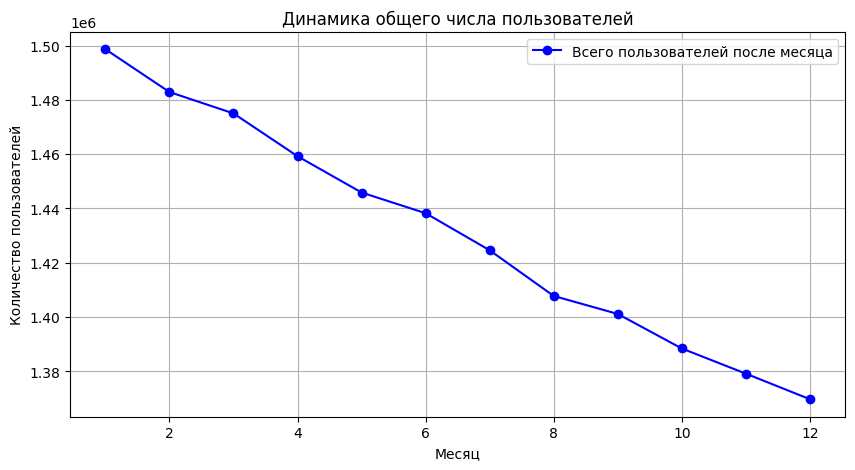

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(df_megafon['Месяц'], df_megafon['Всего пользователей после месяца'], marker='o', linestyle='-', color='b', label='Всего пользователей после месяца')
plt.xlabel('Месяц')
plt.ylabel('Количество пользователей')
plt.title('Динамика общего числа пользователей')
plt.grid(True)
plt.legend()
plt.show()

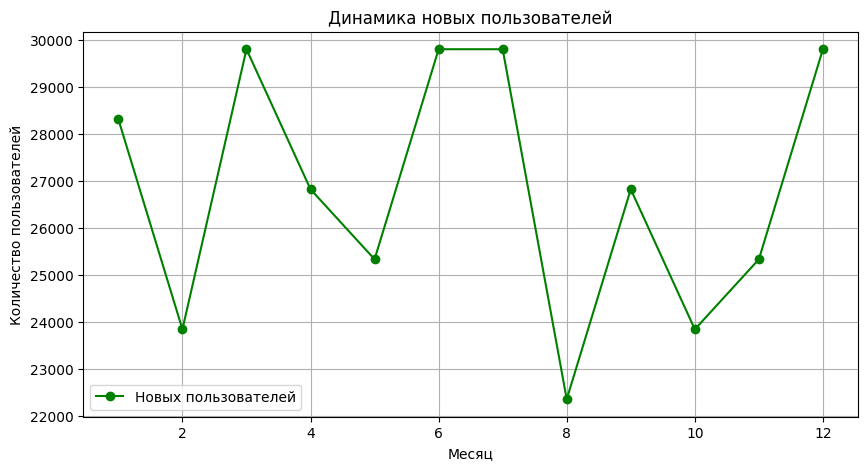

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(df_megafon['Месяц'], df_megafon['Новых пользователей'], marker='o', linestyle='-', color='g', label='Новых пользователей')
plt.xlabel('Месяц')
plt.ylabel('Количество пользователей')
plt.title('Динамика новых пользователей')
plt.grid(True)
plt.legend()
plt.show()

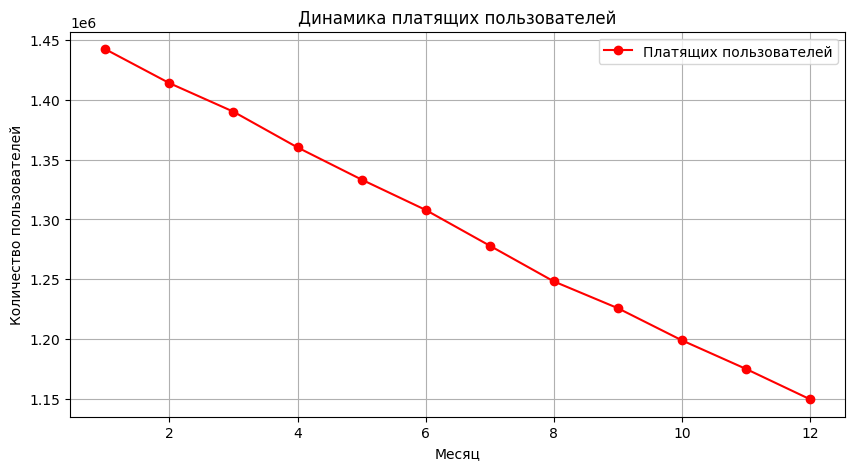

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(df_megafon['Месяц'], df_megafon['Платящих пользователей'], marker='o', linestyle='-', color='r', label='Платящих пользователей')
plt.xlabel('Месяц')
plt.ylabel('Количество пользователей')
plt.title('Динамика платящих пользователей')
plt.grid(True)
plt.legend()
plt.show()

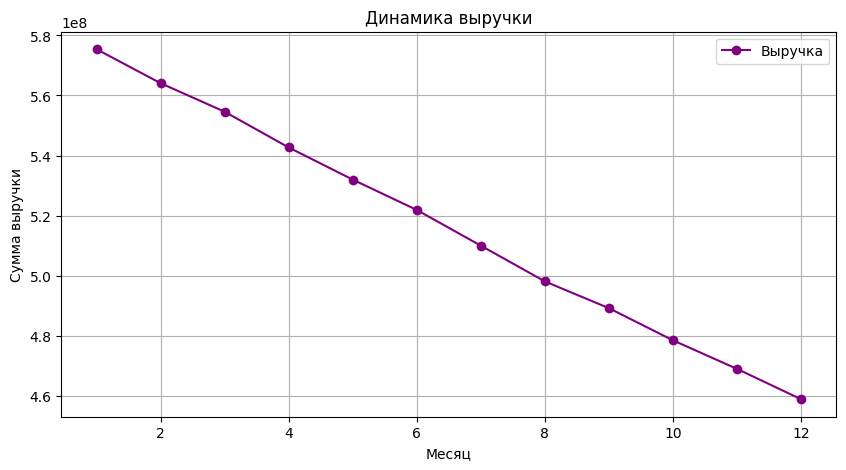

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(df_megafon['Месяц'], df_megafon['Выручка'], marker='o', linestyle='-', color='purple', label='Выручка')
plt.xlabel('Месяц')
plt.ylabel('Сумма выручки')
plt.title('Динамика выручки')
plt.grid(True)
plt.legend()
plt.show()

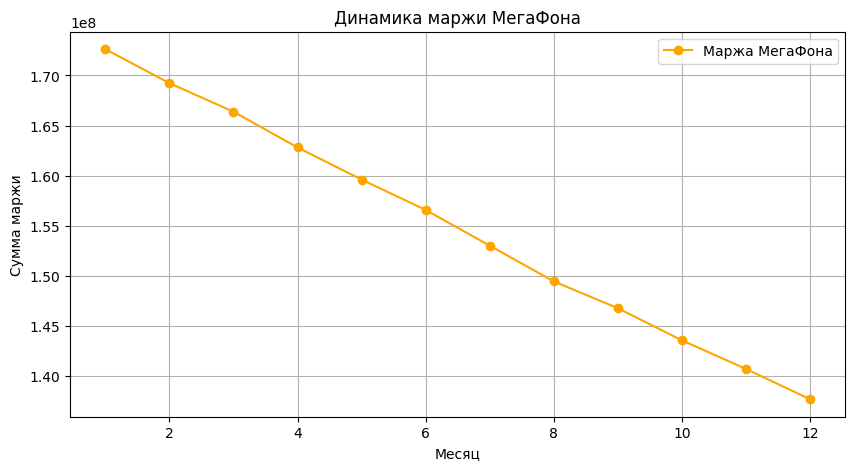

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(df_megafon['Месяц'], df_megafon['Маржа МегаФона'], marker='o', linestyle='-', color='orange', label='Маржа МегаФона')
plt.xlabel('Месяц')
plt.ylabel('Сумма маржи')
plt.title('Динамика маржи МегаФона')
plt.grid(True)
plt.legend()
plt.show()

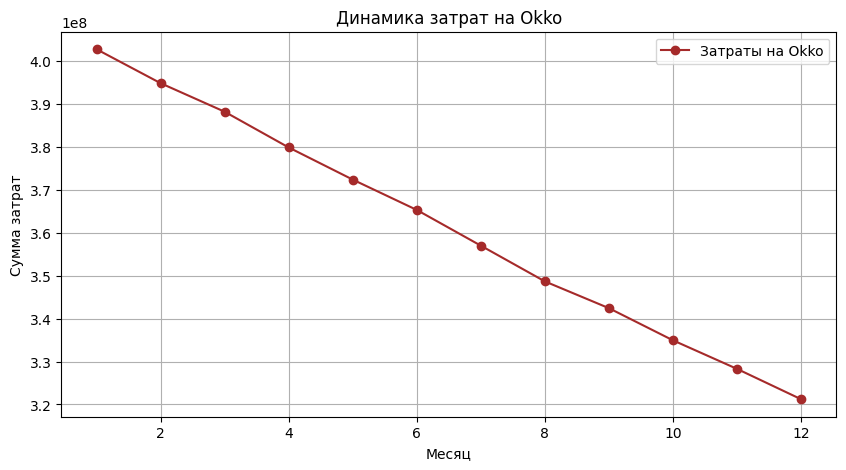

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(df_megafon['Месяц'], df_megafon['Затраты на Okko'], marker='o', linestyle='-', color='brown', label='Затраты на Okko')
plt.xlabel('Месяц')
plt.ylabel('Сумма затрат')
plt.title('Динамика затрат на Okko')
plt.grid(True)
plt.legend()
plt.show()